Aakash

EP21BTECH11001

HW-4

In [1701]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

1 Numpy Implementation
In this assignment you will implement each of the components of a Convolutional Neural Network (CNN)

from scratch (i.e., without using built-in functions for convolution, pooling, non-linearity, padding, strid-
ing). Your implementation must accept an image input and generate an output vector. Use random weights

for filter kernels and fully connected layers. Specifically, implement the following:

1. Convolution function: It accepts as input an image, a filter kernel, stride, padding and the non-linear
function. The function must correlate (convolve) the input image (after padding if specified) with
the kernel (at the specified stride size) and generate an output activation after applying the specified
non-linearity. Verify with the standard options for the non-linear activation functions - sigmoid,
tanh, ReLU, Parametric ReLU (PReLU). Display the input image, the filter kernel and the output
activation map. Ensure that your function can accept multi-channel input and a corresponding kernel
volume. (3)

2. Pooling function: It accepts as input the activation map output from the convolution function, a
pooling function, and stride. The function must output the appropriately pooled activation map.
Display the input activation map and the pooled output. (2)

3. Convolution layer function: It accepts as input a volume (image or activation maps), filter kernels,
stride, padding and the non-linear function. The function must convolve the input volume (after
padding if specified) with each of the kernels (at the specified stride size) and generates an output
activation volume after applying the specified non-linearity. Display the input image or activation
maps, the filter kernels and the output activation maps. Verify that the output of this function does
indeed have the expected size (W × H × C) as discussed in class. (1)

4. Pooling layer function: It accepts as input the activation map volume, the pooling function, stride,
and generates a pooled output volume. Display the input and output volumes. (1)

5. Flattening (unraveling) function: It accepts as input the activation map volume output by the pool-
ing layer and generates a vector of a specified size. It is important to note that this function has a
weight matrix associated with it whose size is chosen such that the input and desired output sizes are
matched. (1)

In [1702]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    s = sigmoid(x)
    return (1-s)*s

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)
# def softmax(x):
#     e_x = np.exp(x - np.max(x)).astype(float)  # Shift values and ensure float type
#     return (e_x / e_x.sum(axis=0)).astype(float)


# def softmax(x):
#     e_x = np.exp(x - np.max(x))  # Shift values for numerical stability
#     return e_x / e_x.sum(axis=0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanhx(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0,x)

def prelu(x,alpha=0.1):
    return np.where(x>0,x,alpha*x)


def activation_fctn(output,activation):
    if(activation=='sig'):
        output=sigmoid(output)
    elif(activation=='tanh'):
        output=tanhx(output)
    elif(activation=='relu'):
        output=relu(output)
    elif(activation=='prelu'):
        output=prelu(output)
    else:
        raise ValueError("Unsupported activation function")
    return output   

In [1703]:
def avgPooling(input,output,kernel_h,kernel_w,stride):
    input_h,input_w=input.shape
    output_h,output_w=output.shape
    for h in range(output_h):
            for w in range(output_w):
                sum=0.0
                for i in range(kernel_h):
                    for j in range(kernel_w):
                        sum+=input[(h*stride)+i][(w*stride)+j]
                sum/=(kernel_h*kernel_w)
                output[h][w]=sum        
    return output



def maxPooling(input,output,kernel_h,kernel_w,stride):
    input_h,input_w=input.shape
    output_h,output_w=output.shape
    for h in range(output_h):
        for w in range(output_w):
            res = float('-inf')
            for i in range(kernel_h):
                for j in range(kernel_w):
                    res=max(input[(h*stride)+i][(w*stride)+j],res)
            output[h][w]=res
    return output


def minPooling(input,output,kernel_h,kernel_w,stride):
    input_h,input_w=input.shape
    output_h,output_w=output.shape
    for h in range(output_h):
        for w in range(output_w):
            res = float('inf')
            for i in range(kernel_h):
                for j in range(kernel_w):
                    res=min(input[(h*stride)+i][(w*stride)+j],res)
            output[h][w]=res
    return output

In [1704]:
class CNN:
    #1. first of all implement convolution function
    # input: image filter/kernel/stride/padding/non-linear fctn
    # conventions: image_h/image_w/channels/kernel_h/kernel_w/kernel_channels
    # checkconditns: channels==kernel_channels/

    def Convolution(self,image,kernel,stride,padding,activation):

        #add padding first to image with filling 0 to padding cells
        if padding>0:
            image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

        # size of imputs
        image_h,image_w,channels=image.shape
        kernel_h,kernel_w,kernel_channels=kernel.shape

        # necessary condition check
        if kernel_channels!=channels:
            raise ValueError("Kernel and image must have same no of channels")

        #now getting the output size   
        # dimension of output matrix -> (n-l+2p)/s+1 
        output_h=int(((image_h-kernel_h)/stride)+1)
        output_w=int(((image_w-kernel_w)/stride)+1)
        output=np.zeros((output_h,output_w))
        
        for h in range(output_h):
            for w in range(output_w):
                curr=0
                for c in range(channels):
                    for i in range(kernel_h):
                        for j in range(kernel_w):
                            curr+=kernel[i][j][c]*image[(h*stride)+i][(w*stride)+j][c]
                output[h][w]=curr
        output=activation_fctn(output,activation)
        return output
    

    # 2. now will will implement pooling function
    # input-> inputmap/pooling function/stride/dimensionofkernel
    def Pooling(self,inputmap,pooling_fctn,stride,kernel_h,kernel_w):

        # getting the inputmap dimensions
        inputmap_h,inputmap_w=inputmap.shape

        # getting the outputmap dimensions
        outputmap_h=int(((inputmap_h-kernel_h)/stride)+1)
        outputmap_w=int(((inputmap_w-kernel_w)/stride)+1)
        outputmap=np.zeros((outputmap_h,outputmap_w))
        if(pooling_fctn=='max'):
            maxPooling(inputmap,outputmap,kernel_h,kernel_w,stride)
        elif(pooling_fctn=='min'):
            minPooling(inputmap,outputmap,kernel_h,kernel_w,stride)
        elif(pooling_fctn=='avg'):
            avgPooling(inputmap,outputmap,kernel_h,kernel_w,stride)    
        else:
            raise ValueError("Unsupported pooling function")
        return outputmap
        

   # 3 Convolution layer function
    def ConvolutionLayer(self,input_volume, kernels, stride, padding, activation):
        # Add padding to the input volume
        if padding>0:
            input_volume = np.pad(input_volume, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

        # Get dimensions of the input and kernel
        input_h, input_w, input_channels = input_volume.shape
        num_kernels,kernel_h, kernel_w, kernel_channels  = kernels.shape

        # Check if kernel channels match input channels
        if kernel_channels != input_channels:
            raise ValueError("Kernel and input volume must have the same number of channels")

        # Calculate output dimensions
        output_h = int((input_h - kernel_h) / stride + 1)
        output_w = int((input_w - kernel_w) / stride + 1)
        output_volume = np.zeros((output_h, output_w,num_kernels))

        # Convolve each kernel with the input volume and store in the output volume
        for k in range(num_kernels):
            output_volume[:,:,k] =self.Convolution(input_volume, kernels[k], stride,0,activation)

        for i in range (num_kernels):
            output_volume[:,:,i]=activation_fctn(output_volume[:,:,i],activation)
        return output_volume
    
            


    # 4. now will will implement pooling function
    # input-> inputmap/pooling function/stride/dimensionofkernel
    def PoolingLayer(self,inputmap,pooling_fctn,stride,kernel_h,kernel_w):

        # getting the inputmap dimensions
        inputmap_h,inputmap_w,inputmap_num=inputmap.shape

        # getting the outputmap dimensions
        outputmap_h=int(((inputmap_h-kernel_h)/stride)+1)
        outputmap_w=int(((inputmap_w-kernel_w)/stride)+1)
        outputmap=np.zeros((outputmap_h,outputmap_w,inputmap_num))
        if(pooling_fctn=='max'):
            for k in range(inputmap_num):
                maxPooling(inputmap[:,:,k],outputmap[:,:,k],kernel_h,kernel_w,stride)
        elif(pooling_fctn=='min'):
            for k in range(inputmap_num):
                minPooling(inputmap[:,:,k],outputmap[:,:,k],kernel_h,kernel_w,stride)
        elif(pooling_fctn=='avg'):
            for k in range(inputmap_num):
                avgPooling(inputmap[:,:,k],outputmap[:,:,k],kernel_h,kernel_w,stride)
        else:
            raise ValueError("Unsupported pooling function")
        return outputmap

    #5 flatten function
    def flatten(self,input_volume):
        return input_volume.flatten()

    def flatten_with_weights(self,input_volume, weight_matrix):
        # Flatten the input volume
        # print(input_volume.shape)
        flattened_vector = self.flatten(input_volume).reshape(1,-1)
        

        # # Generate a weight matrix with shape (flattened_vector.shape[0], size)
        # weight_matrix = np.random.randn(flattened_vector.shape[1], size)
        
        # # Perform the dot product
        output_vector = np.dot(flattened_vector, weight_matrix)
        # print(output_vector.shape)

        return output_vector

6. Multilayer Perceptron (MLP) function (Fully Connected): It accepts as input a vector, the number of
hidden layers, the size of each hidden layer, the non-linear function, and the size of the output layer.
This function should generate an output vector of the specified size. Generate the output with and
without the softmax function applied to the output layer. (2)

In [1705]:
class ANN:
    
    def __init__(ann,input,no_hid_layer:int,size_hid_layer:list,activation,size_output:int):
        ann.weight=[]
        ann.bias =[]
        ann.no_hid_layer=no_hid_layer
        ann.weight.append(np.random.randn(size_hid_layer[0],input.shape[1]))
        ann.bias.append(np.random.randn(size_hid_layer[0]))
        ann.activation=activation
        for i in range (1,no_hid_layer):
            ann.weight.append(np.random.randn(size_hid_layer[i],size_hid_layer[i-1]))
            ann.bias.append(np.random.randn(size_hid_layer[i]))
        ann.weight.append(np.random.randn(size_output,size_hid_layer[no_hid_layer-1]))
        ann.bias.append(np.random.randn(size_output))
        # print(ann.weight)
        # print(ann.bias)
    def output(ann,input:np.array):
        prev=input
        for k in range(0,ann.no_hid_layer+1):
            prev=np.dot(prev,ann.weight[k].T)
            prev=activation_fctn(prev,ann.activation)
        output_wo_softmax=prev
        output_with_softmax=softmax(prev)
        return output_with_softmax,output_wo_softmax

In [1706]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


data_batch=unpickle('cifar-10-batches-py/data_batch_1')
# Extract images and labels
images = data_batch[b'data']  # Images are stored under the 'data' key
labels = data_batch[b'labels']  # Labels are stored under the 'labels' key

# Reshape the images to (num_images, 32, 32, 3)
# CIFAR-10 stores images in (num_images, 3072) where each 3072 is 32*32*3
images = images.reshape(-1, 3, 32, 32)  # Reshape to (num_images, 3, 32, 32)
images = images.transpose(0, 2, 3, 1)   # Rearrange to (num_images, 32, 32, 3)

print(images.shape)  # Should print (10000, 32, 32, 3) for a single CIFAR-10 batch


(10000, 32, 32, 3)


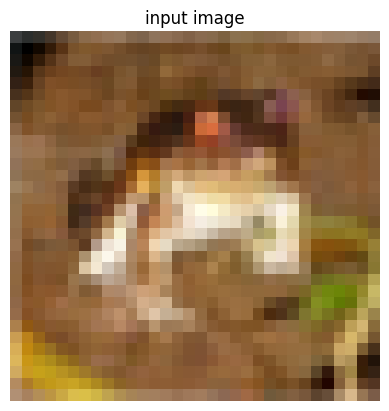

In [1707]:
cnn=CNN()

# Display the image
image=images[0]
plt.imshow(image)
plt.title('input image')
plt.axis('off')  # Turn off axis
plt.show()
kernel= np.random.randn(4,4,3)

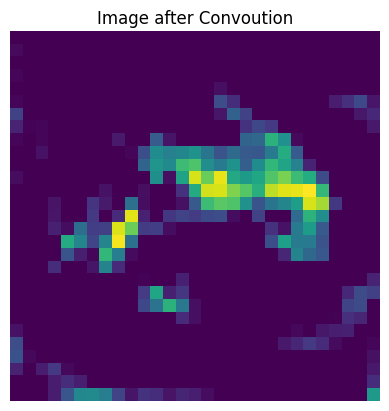

In [1708]:
#now just trying to verify our Convoluion function and show it's output
output=cnn.Convolution(image,kernel,1,0,'relu')
plt.imshow(output)
plt.title('Image after Convoution')
plt.axis('off')  # Turn off axis
plt.show()

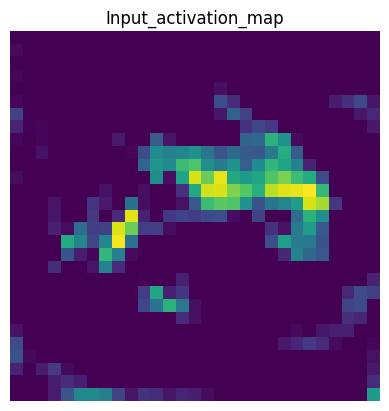

In [1709]:
input_activ_map=output
plt.imshow(input_activ_map)
plt.title('Input_activation_map')
plt.axis('off')  # Turn off axis
plt.show()

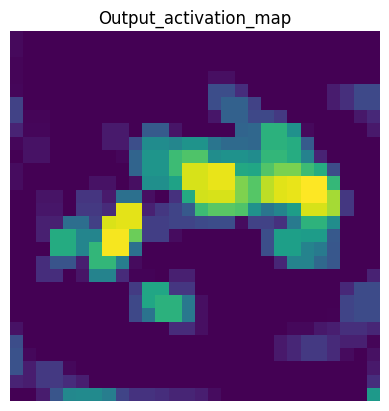

In [1710]:
#now just trying to verify our Pooling function and show it's output function map
# also input function map is printed above
output_activ_map=cnn.Pooling(input_activ_map,'max',1,2,2)
plt.imshow(output_activ_map)
plt.title('Output_activation_map')
plt.axis('off')  # Turn off axis
plt.show()

(31, 31, 5)
5


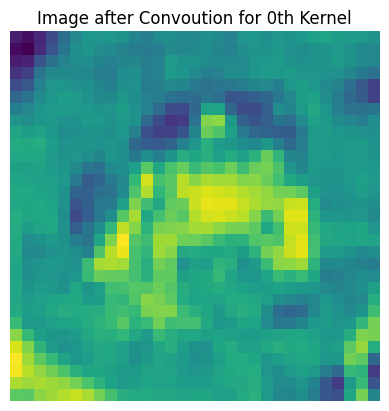

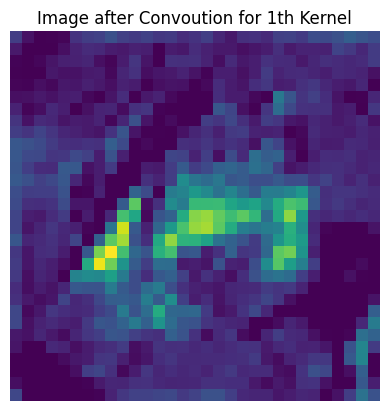

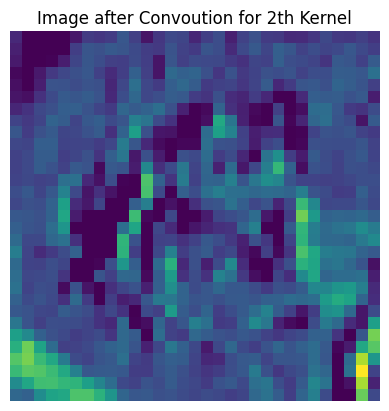

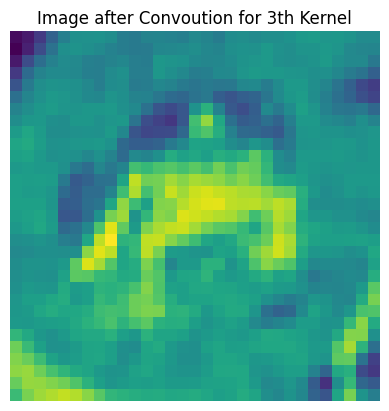

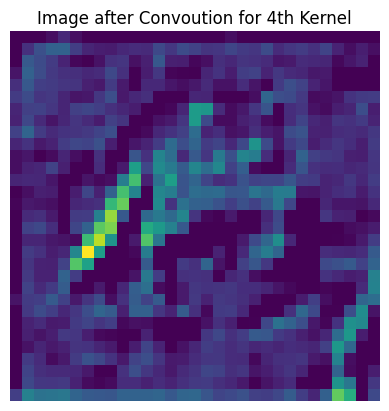

In [1711]:
#now verifying our Convolution layer function and dimension of it's output and display images

kernel=np.random.randn(5,2,2,3)
output=cnn.ConvolutionLayer(image,kernel,1,0,'relu')
print(output.shape)
# print(output)
print(output.shape[2])
for i in range (output.shape[2]):
    plt.imshow(output[:,:,i])
    plt.title(f'Image after Convoution for {i}th Kernel')
    plt.axis('off')  # Turn off axis
    plt.show()


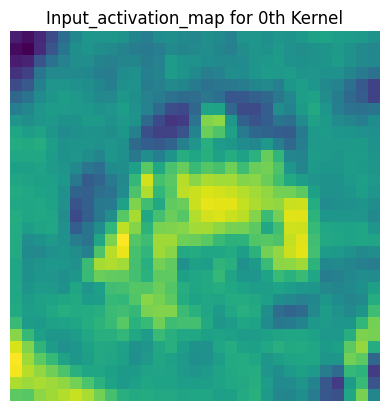

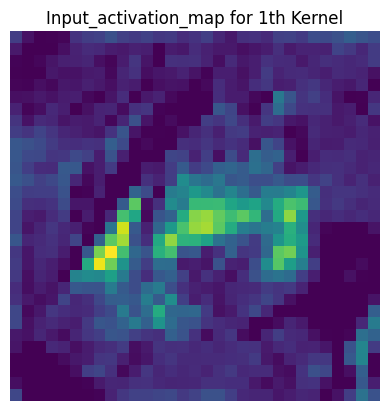

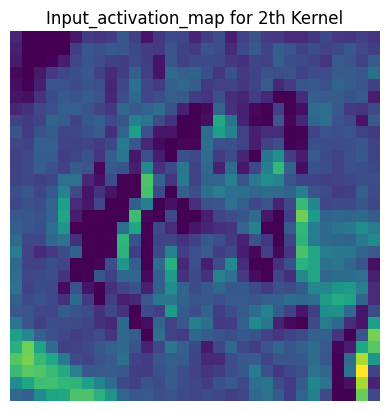

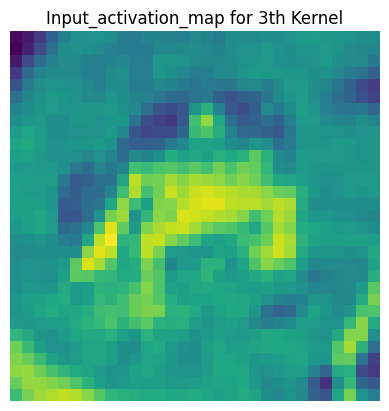

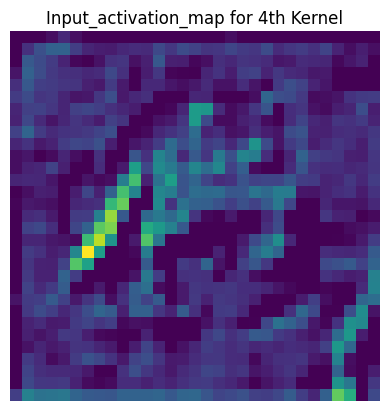

In [1712]:
input_activ_map=output
for i in range (input_activ_map.shape[2]):
    plt.imshow(input_activ_map[:,:,i])
    plt.title(f'Input_activation_map for {i}th Kernel')
    plt.axis('off')  # Turn off axis
    plt.show()

(31, 31, 5)


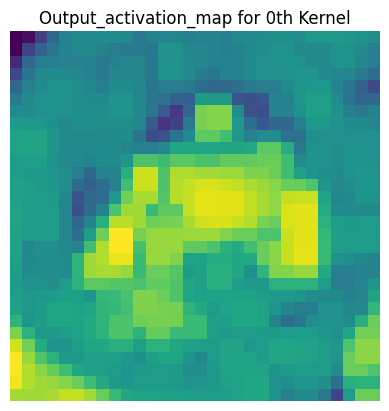

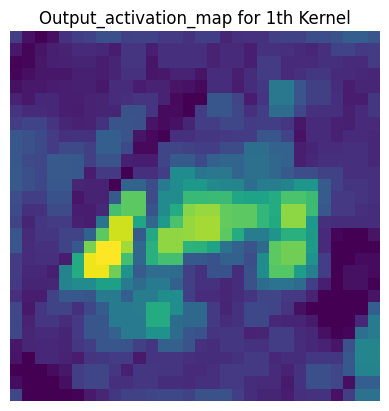

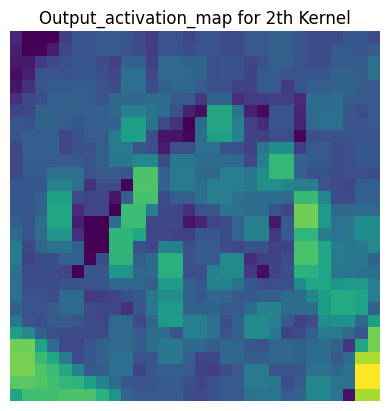

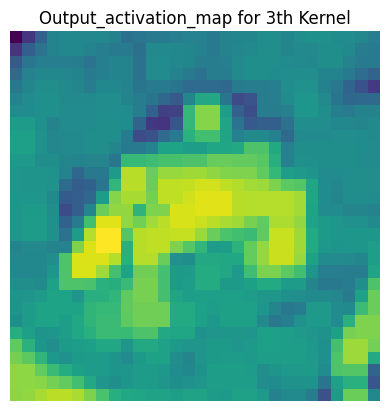

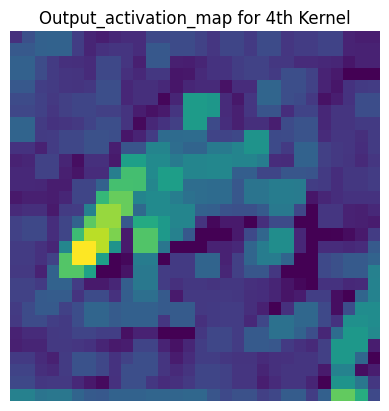

In [1713]:
#now just trying to verify our Pooling function and show it's output function map
# also input function map is printed above
output_activ_map=cnn.PoolingLayer(input_activ_map,'max',1,2,2)
print(output.shape)
for i in range (output_activ_map.shape[2]):
    plt.imshow(output_activ_map[:,:,i])
    plt.title(f'Output_activation_map for {i}th Kernel')
    plt.axis('off')  # Turn off axis
    plt.show()

In [1714]:
print(output_activ_map.shape)
n=output_activ_map.shape[0]*output_activ_map.shape[1]*output_activ_map.shape[2]
flattened=cnn.flatten_with_weights(output_activ_map,np.eye(n,n))
print(flattened.shape)

(30, 30, 5)
(1, 4500)


Now all our CNN functions are verified now try to use the given example

7. Feed-forward path: Finally, use the functions you have written to implement a CNN with the follow-
ing architecture. The CNN must accept an image input and output a vector of appropriate dimension.

In other words, the function must effectively implement the feed-forward path in a CNN. (3)

• Input image of size 32 × 32 × 3. Use images from the CIFAR-10 dataset.

• Convolution layer with 4 kernels of size 5 × 5, ReLU activation, and stride of 1. Ensure that each
activation channel output from this conv layer has the same width and height as its input.

• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.

• Convolution layer with 4 kernels of size 5 × 5 × 4, ReLU activation and stride of 1. As before,
ensure that the input and output width and height match.

• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.

• This network has a flattening layer that is an identity matrix i.e., it simply passes the unravelled
vector forward. Note that there is no need to learn the parameters of this layer.

• An MLP with one hidden layer that accepts as input the flattening layer output maps it to a
hidden layer with 49 nodes and then onto 10 output nodes. Use ReLU activation for the MLP.
The output of the MLP is normalized using the softmax function.

In [1715]:

class SimpleCNN(CNN,ANN):
    def __init__(self):
        # Initialize weights for the CNN layers and MLP
        self.conv1_kernels = np.random.randn(4, 5, 5, 3)  # 4 kernels of size 5x5x3
        self.conv2_kernels = np.random.randn(4, 5, 5, 4)  # 4 kernels of size 5x5x4
        
        
    def forward(self, image):
        # Convolution layer 1
        conv1_output = self.ConvolutionLayer(image, self.conv1_kernels, stride=1, padding=2, activation='relu')
        print(conv1_output.shape)

        # Max Pooling layer 1
        pool1_output = self.PoolingLayer(conv1_output, pooling_fctn='max', stride=2, kernel_h=2, kernel_w=2)
        print(pool1_output.shape)

        # Convolution layer 2
        conv2_output = self.ConvolutionLayer(pool1_output, self.conv2_kernels, stride=1, padding=2, activation='relu')
        print(conv2_output.shape)
        
        
        # Max Pooling layer 2
        pool2_output = self.PoolingLayer(conv2_output, pooling_fctn='max', stride=2, kernel_h=2, kernel_w=2)
        print(pool2_output.shape)

        # Flatten layer
        n=pool2_output.shape[0]*pool2_output.shape[1]*pool2_output.shape[2]
        f_weight_matrix=np.eye(n,n)
        flatten_output = self.flatten_with_weights(pool2_output,f_weight_matrix)
        print(flatten_output.shape)
        # print(flatten_output)


        # now it's time to use our ANN 
        ann=ANN(flatten_output,1,np.array([49]),'relu',10)
        output_w_softmax,output_wo_softmax=ann.output(flatten_output)
        print(output_w_softmax.shape)
        print(output_wo_softmax.shape)
        print(output_wo_softmax)
        print(output_w_softmax)
        # # MLP (Fully Connected Layer)
        # # Layer 1: 256 -> 49 nodes with ReLU activation
        # hidden_output = np.dot(flatten_output, self.fc_hidden_weights)
        # hidden_output = relu(hidden_output)
        
        # # Layer 2: 49 -> 10 nodes with softmax
        # output = np.dot(hidden_output, self.fc_output_weights)
        # output_softmax = softmax(output)
        
        return output_w_softmax
    
    # Assuming ConvolutionLayer, PoolingLayer, and flatten functions are part of this class
    # Define methods for ConvolutionLayer, PoolingLayer, and flatten, or import them if already defined

# Instantiate and test the CNN with an image
scnn = SimpleCNN()
image = images[0]  # Example image from CIFAR-10

# output_vector=cnn.ConvolutionLayer(image, kernel, stride=1, padding=1, activation='relu')
# print(output_vector.shape)
# Run the forward pass and print output
output_vector = scnn.forward(image)
# print(output_vector.shape)
# print("Output vector:", output_vector)
# print("Output shape:", output_vector.shape)  # Expected shape: (10,)


(32, 32, 4)
(16, 16, 4)
(16, 16, 4)
(8, 8, 4)
(1, 256)
(1, 10)
(1, 10)
[[     0.          16535.6503605   93602.1673449   21205.71815207
   59586.93911245  45769.12264645  83938.73100468  27985.36436884
  152831.35388962      0.        ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


8. (a) Choose an image from each of the 10 classes and display the output vector for each case. Do you
see any trend in the output vectors? (1)

(b) Does a randomly initialized network show any discriminability? Visualize the bottleneck layer
(output of flattening layer) using builtin tSNE plots. Choose three images per class. If you are
wondering about this question, check out the Deep Image Prior paper. (1)

In [1716]:
# image=images[0]
# label=labels[0]
# print(label)
# plt.imshow(image)
# plt.title('input image')
# plt.axis('off')  # Turn off axis
# plt.show()
# kernel= np.random.randn(4,4,3)

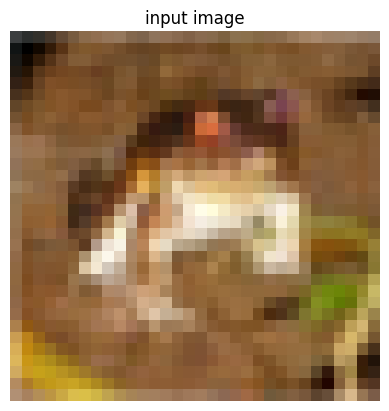

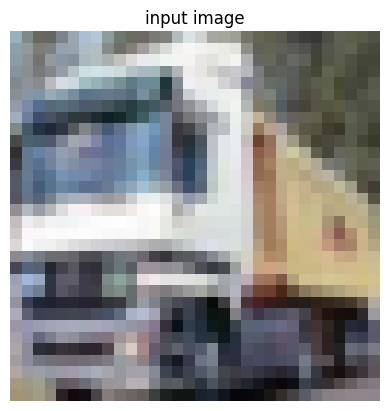

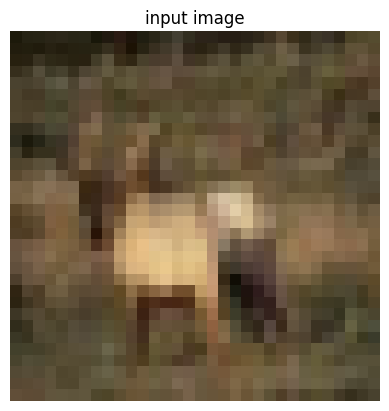

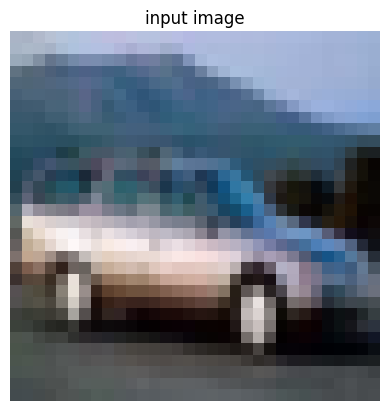

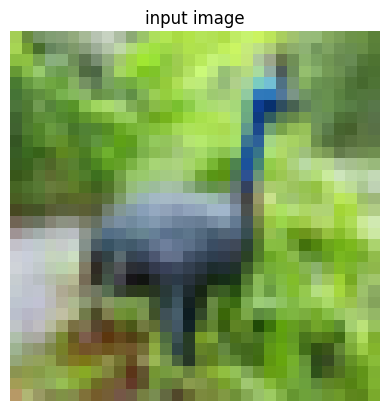

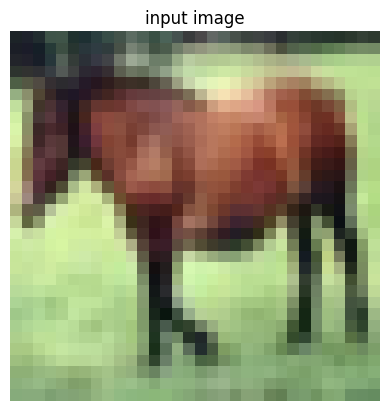

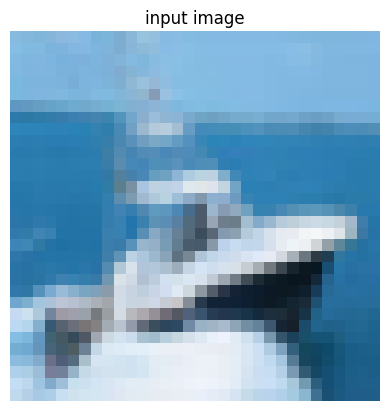

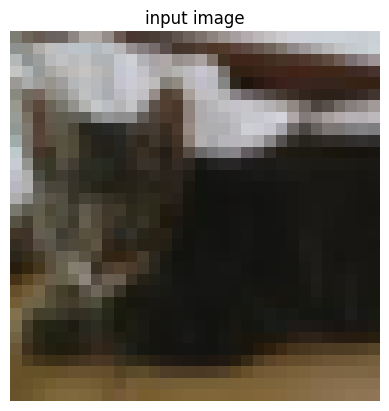

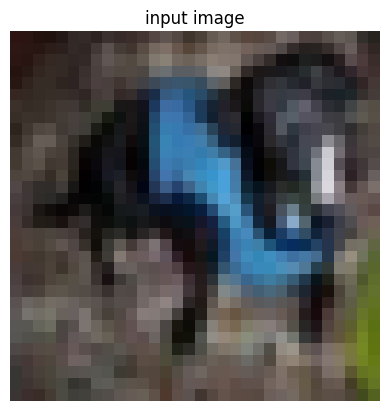

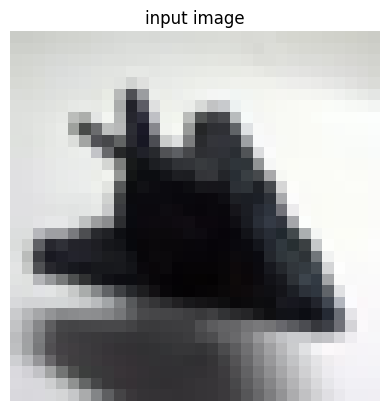

In [1717]:
# print(labels.dtype)
v=np.zeros(10)
output=[]
for i in range(len(image)):
    if v[labels[i]]==0:
        v[labels[i]]=1
        output.append(images[i])


for i in range(len(output)):
    plt.imshow(output[i])
    plt.title('input image')
    plt.axis('off')  # Turn off axis
    plt.show()
            

In [1718]:
# Part (a): Display Output Vectors for Each Class
output_vector=[]
for i in range(10):
    image=images[i]
    output=scnn.forward(image)
    output_vector.append(output)

(32, 32, 4)
(16, 16, 4)
(16, 16, 4)
(8, 8, 4)
(1, 256)
(1, 10)
(1, 10)
[[ 60255.19981017  13637.81257149      0.          72202.27804446
       0.          78913.8395147       0.         126835.59874041
       0.              0.        ]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
(32, 32, 4)
(16, 16, 4)
(16, 16, 4)
(8, 8, 4)
(1, 256)
(1, 10)
(1, 10)
[[317796.35974502      0.              0.          78333.5574378
       0.              0.           6605.21161538  71546.79090596
  112572.58312315      0.        ]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(32, 32, 4)
(16, 16, 4)
(16, 16, 4)
(8, 8, 4)
(1, 256)
(1, 10)
(1, 10)
[[ 85984.74959072 123636.78664775      0.          52567.68008978
   31834.43107768  16181.74146617      0.              0.
   11684.18104784      0.        ]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(32, 32, 4)
(16, 16, 4)
(16, 16, 4)
(8, 8, 4)
(1, 256)
(1, 10)
(1, 10)
[[    0.         44487.52732407     0.             0.
  42044.23853892     0.          5699.94644498 71361.6048944
  62

In [1719]:
for i in range(len(output_vector)):
    print(output_vector[i])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
